# CNN_Python_Keras_Fruits360_Dataset

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from glob import glob 

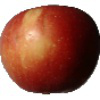

In [16]:
img = load_img("Training/Apple Braeburn/0_100.jpg")
img

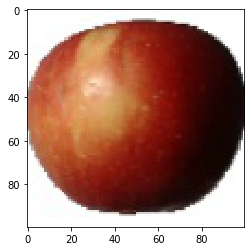

In [17]:
plt.imshow(img)

plt.show()

In [18]:
x = img_to_array(img)
x.shape

(100, 100, 3)

In [19]:
classname = glob('Training/*')
print("Number of class: ", len(classname))

Number of class:  120


In [23]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape= x.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32,kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64,kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(len(classname)))
model.add(Activation("softmax"))

In [24]:
model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy' ,metrics=['accuracy'])

In [25]:
batch_size = 32

In [26]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.3,
    zoom_range=0.3, horizontal_flip=True)

In [27]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
train_generator = train_datagen.flow_from_directory("Training/",color_mode='rgb',
                                                    target_size=x.shape[:2],
                                                    class_mode='categorical',
                                                    batch_size=32, )

Found 60498 images belonging to 120 classes.


In [29]:
test_generator = test_datagen.flow_from_directory("Test/",color_mode='rgb',
                                                    target_size=x.shape[:2],
                                                    class_mode='categorical',
                                                    batch_size=32, )

Found 20622 images belonging to 120 classes.


In [37]:
hist = model.fit_generator(generator=train_generator,
    steps_per_epoch=1600//batch_size,
    epochs=100,
    validation_data=test_generator,
    validation_steps=800//batch_size,
    )

Epoch 1/100
50/50 [==============================] - 12s 232ms/step - loss: 0.1325 - accuracy: 0.9694 - val_loss: 0.0199 - val_accuracy: 0.9625
Epoch 2/100
50/50 [==============================] - 10s 204ms/step - loss: 0.1173 - accuracy: 0.9675 - val_loss: 0.0268 - val_accuracy: 0.9187
Epoch 3/100
50/50 [==============================] - 11s 224ms/step - loss: 0.1438 - accuracy: 0.9650 - val_loss: 0.2503 - val_accuracy: 0.9575
Epoch 4/100
50/50 [==============================] - 10s 208ms/step - loss: 0.1543 - accuracy: 0.9644 - val_loss: 0.0441 - val_accuracy: 0.9663
Epoch 5/100
50/50 [==============================] - 11s 224ms/step - loss: 0.1147 - accuracy: 0.9750 - val_loss: 0.0865 - val_accuracy: 0.9663
Epoch 6/100
50/50 [==============================] - 12s 238ms/step - loss: 0.0971 - accuracy: 0.9725 - val_loss: 0.6943 - val_accuracy: 0.9075
Epoch 7/100
50/50 [==============================] - 11s 222ms/step - loss: 0.1665 - accuracy: 0.9588 - val_loss: 0.1054 - val_accuracy:

50/50 [==============================] - 11s 221ms/step - loss: 0.1196 - accuracy: 0.9725 - val_loss: 0.0035 - val_accuracy: 0.9712
Epoch 58/100
50/50 [==============================] - 11s 222ms/step - loss: 0.1103 - accuracy: 0.9794 - val_loss: 0.0223 - val_accuracy: 0.9700
Epoch 59/100
50/50 [==============================] - 11s 225ms/step - loss: 0.0933 - accuracy: 0.9762 - val_loss: 0.1945 - val_accuracy: 0.9762
Epoch 60/100
50/50 [==============================] - 11s 221ms/step - loss: 0.1271 - accuracy: 0.9700 - val_loss: 0.0218 - val_accuracy: 0.9850
Epoch 61/100
50/50 [==============================] - 11s 222ms/step - loss: 0.1538 - accuracy: 0.9656 - val_loss: 0.3118 - val_accuracy: 0.9825
Epoch 62/100
50/50 [==============================] - 11s 217ms/step - loss: 0.1318 - accuracy: 0.9725 - val_loss: 0.1991 - val_accuracy: 0.9638
Epoch 63/100
50/50 [==============================] - 11s 220ms/step - loss: 0.0984 - accuracy: 0.9819 - val_loss: 0.0104 - val_accuracy: 0.952

In [76]:
hist.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [39]:
model.save_weights("FirstTrialwith100epochs.h5")

In [83]:
import json
with open("deneme.json" ,'w') as f:
    json.dump(str(hist.history), f)

In [84]:
import codecs
with codecs.open('deneme.json', 'r', encoding='utf-8') as f:
    h = json.loads(f.read())

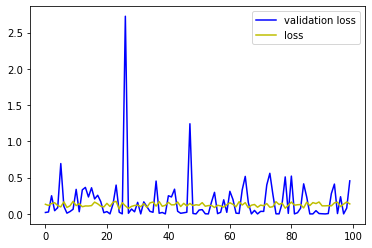

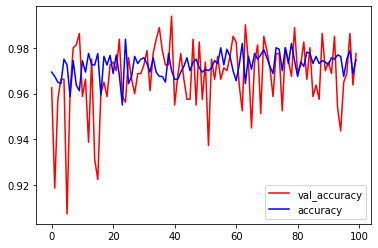

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [85]:
plt.plot(hist.history['val_loss'], color='b', label="validation loss")
plt.plot(hist.history['loss'], color='y', label="loss")
plt.legend()
plt.figure()
plt.plot(hist.history['val_accuracy'], color='r', label="val_accuracy")
plt.plot(hist.history['accuracy'], color='b', label="accuracy")
plt.legend()
plt.show()
plt.figure()

In [54]:
import codecs
with codecs.open('cnn_fruit_hist.json', 'r', encoding='utf-8') as f:
    h = json.loads(f.read())

In [63]:
print(h.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


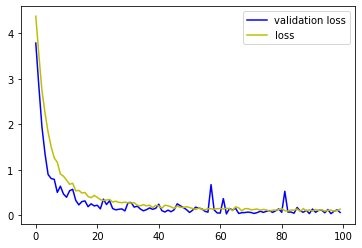

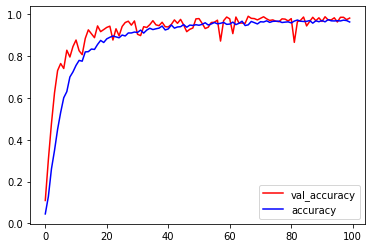

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [68]:
plt.plot(h['val_loss'], color='b', label="validation loss")
plt.plot(h['loss'], color='y', label="loss")
plt.legend()
plt.figure()
plt.plot(h['val_acc'], color='r', label="val_accuracy")
plt.plot(h['acc'], color='b', label="accuracy")
plt.legend()
plt.show()
plt.figure()